In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 14.7 MB/s eta 0:00:0000:01


In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
Path.BASE_PATH = path

In [5]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [6]:
(path/"images").ls()

(#7393) [Path('images/beagle_115.jpg'),Path('images/boxer_18.jpg'),Path('images/Maine_Coon_157.jpg'),Path('images/scottish_terrier_28.jpg'),Path('images/english_setter_6.jpg'),Path('images/american_pit_bull_terrier_79.jpg'),Path('images/boxer_128.jpg'),Path('images/Persian_265.jpg'),Path('images/Maine_Coon_182.jpg'),Path('images/keeshond_89.jpg')...]

In [7]:
fname = (path/"images").ls()[0]

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['beagle']

In [9]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(seed=42),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                item_tfms=Resize(460),
                batch_tfms=aug_transforms(size=224, min_scale=0.75)
                )
dls = pets.dataloaders(path/"images")

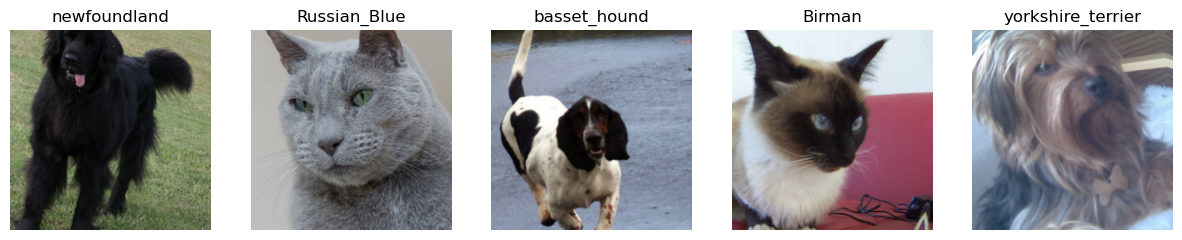

In [10]:
dls.show_batch(nrows=1, ncols=5)

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [12]:
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.528957,0.356631,0.117727,01:48


epoch,train_loss,valid_loss,error_rate,time
0,0.529159,0.307252,0.091340,01:51
1,0.337389,0.233606,0.079161,01:51


In [13]:
x, y = dls.one_batch()

In [14]:
y

TensorCategory([ 1,  4, 11, 27,  4,  6, 26, 18,  6, 27, 35, 34, 26, 11, 25,  0,
                34, 34,  7, 11, 36, 21,  6, 21, 13, 28, 20, 30,  8, 35,  6, 10,
                12,  5, 27, 29, 22, 10,  4, 14,  1, 11, 20,  6, 20, 11, 21,  3,
                30,  2,  8, 35, 24, 11, 34, 31, 22, 26, 36,  0, 14, 25,  9,  4],
               device='cuda:0')

In [15]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

TensorBase([2.3812e-06, 1.3256e-02, 6.4923e-08, 1.2656e-05, 2.7511e-06,
            9.8672e-01, 2.4644e-06, 6.2426e-08, 3.7984e-07, 6.9861e-07,
            1.3135e-07, 4.2091e-07, 7.6046e-09, 5.9187e-08, 5.6653e-08,
            2.4175e-08, 4.4860e-08, 2.4471e-08, 8.1589e-08, 3.1733e-06,
            4.2673e-07, 6.0482e-07, 5.2451e-09, 2.3492e-07, 8.3220e-08,
            1.6906e-08, 8.9314e-09, 1.1745e-07, 4.9914e-08, 5.3476e-08,
            3.7991e-08, 2.0281e-07, 7.3780e-08, 8.0549e-09, 1.3907e-08,
            7.7869e-09, 2.4381e-08])

In [16]:
preds[0].sum()

TensorBase(1.)

In [17]:
len(preds[0])

37

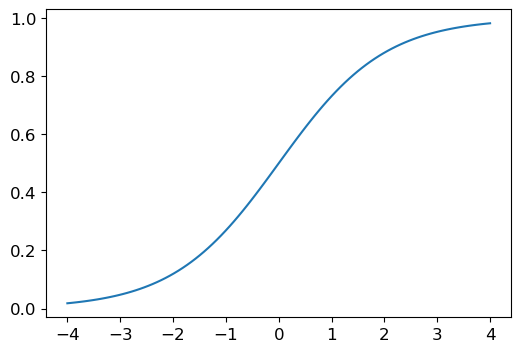

In [18]:
from fastbook import *
plot_function(torch.sigmoid, min=-4, max=4)

In [19]:
torch.random.manual_seed(42)

In [20]:
acts = torch.randn((6, 2)) * 2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [35]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [36]:
(acts[:, 0] - acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

```python
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)
```

In [38]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

Intuitively, the softmax function really wants to pick one class among the others, so it's ideal for training a classifier when we know each picture has a definite label. (Note that it may be less ideal during inference, as you might want your model to sometimes tell you it doesn't recognize any of the classes that it has seen during training, and not pick a class because it has a slightly bigger activation score. In this case, it might be better to train a model using multiple binary output columns, each using a sigmoid activation.)


In [39]:
targ = tensor([0, 1, 0, 1, 1, 0])

In [25]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [26]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [27]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [28]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

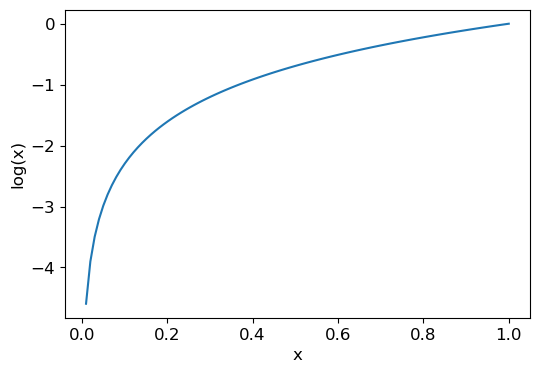

In [29]:
plot_function(torch.log, min=0, max=1, ty='log(x)', tx='x')

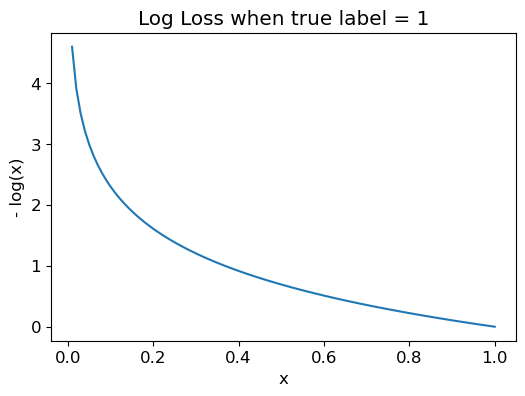

In [30]:
plot_function(lambda x: -1*torch.log(x), min=0,max=1, tx='x', ty='- log(x)', title = 'Log Loss when true label = 1')

In [31]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

When we first take the softmax, and then the log likelihood of that, that combination is called cross-entropy loss. In PyTorch, this is available as nn.CrossEntropyLoss (which, in practice, actually does log_softmax and then nll_loss):

In [40]:
loss_func = nn.CrossEntropyLoss()

In [41]:
loss_func(acts, targ)

tensor(1.8045)

In [42]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [43]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

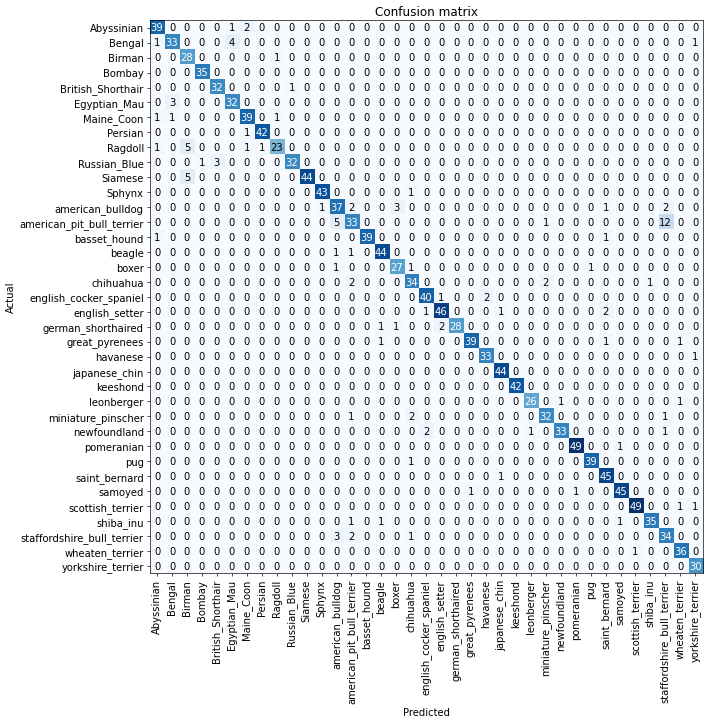

In [44]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [45]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Ragdoll', 'Birman', 5),
 ('Siamese', 'Birman', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

Really high learning rate

In [46]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.764706,3.464993,0.392422,01:49


epoch,train_loss,valid_loss,error_rate,time
0,3.516459,9.988578,0.550068,01:58


/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


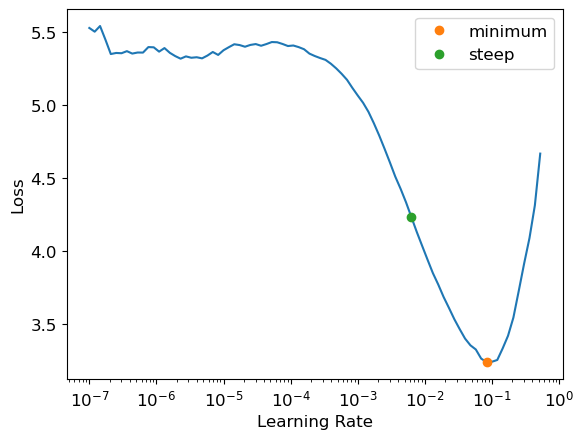

In [47]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [48]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 6.31e-03


When we create a model from a pretrained network fastai automatically freezes all of the pretrained layers for us. When we call the fine_tune method fastai does two things:

- Trains the randomly added layers for one epoch, with all other layers frozen
- Unfreezes all of the layers, and trains them all for the number of epochs requested


In [49]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)


epoch,train_loss,valid_loss,error_rate,time
0,1.280310,0.357564,0.108931,01:50


epoch,train_loss,valid_loss,error_rate,time
0,0.506970,0.404145,0.120433,01:58
1,0.341159,0.223141,0.067659,01:56


In [50]:
learn.fine_tune??

Signature:
learn.fine_tune(
    epochs,
    base_lr=0.002,
    freeze_epochs=1,
    lr_mult=100,
    pct_start=0.3,
    div=5.0,
    *,
    lr_max=None,
    div_final=100000.0,
    wd=None,
    moms=None,
    cbs=None,
    reset_opt=False,
    start_epoch=0,
)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      /opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py
Type:      method


In [56]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.119329,0.334753,0.110961,01:48
1,0.539267,0.268451,0.086604,01:52
2,0.324365,0.217446,0.072395,01:50


In [57]:
learn.unfreeze()

SuggestedLRs(valley=1.2022644114040304e-05)

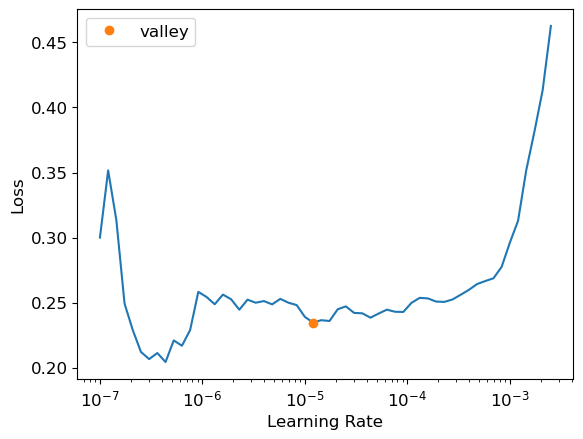

In [58]:
learn.lr_find()

In [59]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.244709,0.210910,0.073748,01:58
1,0.244742,0.208456,0.073748,01:58
2,0.228356,0.202403,0.067659,01:59
3,0.192576,0.201774,0.069689,01:57
4,0.182761,0.202334,0.069689,01:57
5,0.185413,0.197276,0.067659,01:58
